In [ ]:
### Muhammet Furkan Isik   05/02/2021  HW4/FE 621-SIT 

In [1]:
import numpy as np
import pandas as pd
import time 
from scipy.stats import norm
import matplotlib.pyplot as plt

# Problem 1

## (a) Monte Carlo Valuation of European Call Option

In [13]:
def MCEU(K,T,S,sig,r,div,N,M,optype):
    
    start=time.time()
    
    dt=T/N
    
    # risk neutral drift 
    nudt= (r-div-0.5*sig**2)*dt
    
    sigsdt=sig*np.sqrt(dt)
    
    lnS=np.log(S)
    
    
    sum_CT=0
    sum_CT2=0
    
    lnSt=np.zeros((M,N+1))
    
    #lnSt[0,0]= lnS
    
    ST=np.zeros((M,1))
    
    e=np.zeros((M,N))
    
    for  j in range(0,M):
        
        lnSt[j,0]=lnS
        
        
        
        for i in range(1,N+1):
            
            
            e=np.random.normal(0,1,1)
            
            lnSt[j,i]=lnSt[j,i-1]+ nudt+ sigsdt*e
            
        #return lnSt
        
        ST[j]= np.exp(lnSt[j,i])
        
        #return ST
        
        
        if optype== "c":
                   
        
            CT= max(0,ST[j]-K) 
            
        elif optype== "p":
            
            
            CT= max(0,K-ST[j])        
        
        

        
        sum_CT= sum_CT+ CT
        
        sum_CT2= sum_CT2 + CT*CT
        
    
    #return lnSt
    #return ST   
        

    call_value= float(sum_CT/M*np.exp(-r*T))
    
    SD= np.sqrt( (sum_CT2- sum_CT/M)*np.exp(-2*r*T)/ (M-1) )
    
    SE= float(SD/ np.sqrt(M))
    
    end=time.time()
    
    duration=end-start
    
    return call_value, SE, duration 

    #return SD

    #return SE

### Calculate call value

In [14]:
a=MCEU(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,N=10,M=100,optype="c")
a

(10.034012917312175, 1.715842946565834, 0.014039754867553711)

In [15]:
pd.DataFrame(a)

,0
0,10.034013
1,1.715843
2,0.014040


In [16]:
b=MCEU(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,N=10,M=100,optype="p")
b

(6.498896116354739, 1.1452016217745051, 0.013765811920166016)

In [17]:
pd.DataFrame(b)

,0
0,6.498896
1,1.145202
2,0.013766


# (b) Monte Carlo Valuation 

## Antithetic Variance Reduction

In [18]:
def MCAV(K,T,S,sig,r,div,N,M,optype):
    
    start=time.time()
    
    dt=T/N
    
    nudt= (r-div-0.5*sig**2)*dt
    
    sigsdt= sig*np.sqrt(dt)
    
    lnS=np.log(S)
    
    sum_CT=0
    
    sum_CT2=0
    
    
    lnSt1=np.zeros((M,1))
    
    lnSt2=np.zeros((M,1))
    
    St1=np.zeros((M,1))
    St2=np.zeros((M,1))
    
    #lnSt1[0,0]=lnS
    #lnSt2[0,0]=lnS
    
    CT=np.zeros((M,1))
    
    for j in range(0,M-1):
          
            
        #lnSt1[0,0]=lnS
        #lnSt2[0,0]=lnS
        
            
        e=np.random.normal(0,1,1)
            
        lnSt1[j,0]= lnS+ nudt+ sigsdt*e
            
        lnSt2[j,0]= lnS+ nudt+ sigsdt*(-e)
            
        
        
        
        
        St1[j,0]= np.exp(lnSt1[j,0])
        
        St2[j,0]= np.exp(lnSt2[j,0])
        
        
        
        if optype== "c":
            
        
            CT[j,0]= 0.5* ( max(0,St1[j,0]-K) + max(0, St2[j,0]-K) )
        
        elif optype== "p":
            
            CT[j,0]= 0.5* ( max(K-St1[j,0],0) + max(K-St2[j,0],0) )
        
        
        sum_CT= sum_CT+ CT[j,0]
              
        sum_CT2= sum_CT2+ CT[j,0]*CT[j,0]
        
    
    #return lnSt2 
    
    #return St2

    #return CT
    
    #return sum_CT
        
    
    call_value= sum_CT/M*np.exp(-r*T)
    
    SD= np.sqrt( ( sum_CT2 - sum_CT*sum_CT/M )* np.exp(-2*r*T)/ (M-1) )
    
    SE= SD/np.sqrt(M)
    
    
    end=time.time()
    
    duration= end - start
        
        
    return call_value, SE, duration  
        
    

In [19]:
a=MCAV(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,N=1,M=100,optype="p")
a
#a.shape

(5.7619804070276714, 0.44208439876288697, 0.0025610923767089844)

### Delta based Contral Variate

#### Blac_Scholes_delta

In [30]:
def Blac_Scholes_delta(K,T,t,S,sig,r,div,optype):
    
    d1 = 1 / (sig * np.sqrt(T)) * ( np.log(S/K) + (r- div+ sig**2/2) * T)
    
    if optype == 'c':
        return np.exp(-div*(T-t))*norm.cdf(d1)
    if optype == 'p':
        return np.exp(-div*(T-t)*(norm.cdf(d1)-1))

In [31]:
Blac_Scholes_delta(K=100,T=1,t=0.1,S=100,sig=0.2,r=0.06,div=0.03,optype="c")

0.5827575324752046

In [32]:
def MCDCV(K,T,S,sig,r,div,N,M,optype="c"):
    
    start=time.time()
    
    dt=T/N
    
    nudt= (r-div-0.5*sig**2)*dt
    
    sigsdt= sig*np.sqrt(dt)
    
    erddt= np.exp(( r-div)*dt)
    
    beta1= -1
    
    sum_CT=0
    
    sum_CT2=0
    
    
    
    for j in range(1,M+1):
        
        St= S
        
        cv= 0
        
        for i in range(1,N+1):
            
            
            t= (i-1)*dt
            
            
            delta=Blac_Scholes_delta(K,T,t,St,sig,r,div,optype)
            
            # return delta
            
            e= np.random.normal(0,1,1)
            
            Stn= St*np.exp(nudt +sigsdt*e)
            
            cv= cv + delta*(Stn-St*erddt)
            
            St=Stn
            
        
        if optype== "c":
                   
        
            CT= max(0,St-K) + beta1*cv
            
        elif optype== "p":
            
            
            CT= max(0,K-St) + beta1*cv
            
        
        sum_CT= sum_CT+ CT
        
        sum_CT2= sum_CT2+ CT*CT
        
        
    #return delta    
    
    call_value= float(sum_CT/ M*np.exp(-r*T))
    
    SD= np.sqrt(( sum_CT2- sum_CT*sum_CT/M )*np.exp(-2*r*T)/ (M-1))
    
    SE= float(SD/np.sqrt(M))
            
    end=time.time()  
    
    duration= end-start
    
    return call_value,SE, duration
            
  

In [33]:
MCDCV(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,N=10,M=100,optype="c")

(8.999277918921342, 0.2719212359540458, 0.1628100872039795)

## Antithetic and Delta- based contral variates

In [34]:
def MCADCV(K,T,S,sig,r,div,N,M,optype):
    
    
    start=time.time()
    
    dt= T/N
    
    nudt= (r-div-0.5*sig**2)*dt
    
    sigsdt= sig*np.sqrt(dt)
    
    erddt= np.exp(( r-div)*dt)
    
    beta1= -1
    
    sum_CT= 0
    
    sum_CT2= 0 
    
    
    for j in range(1,M+1):
        
        St1=S
        
        St2=S
        
        cv1=0
        
        cv2=0
        
        for i in range(1,N+1):
            
            
            t= (i-1)*dt
            
            delta1= Blac_Scholes_delta(K,T,t,St1,sig,r,div,optype)
            
            delta2= Blac_Scholes_delta(K,T,t,St2,sig,r,div,optype)
            
            e= np.random.normal(0,1,1)
            
            Stn1= St1*np.exp( nudt+ sigsdt*e)
            
            Stn2= St2*np.exp( nudt+ sigsdt*(-e) )
            
            
            cv1= cv1+ delta1*(Stn1-St1*erddt)
            
            cv2= cv2+ delta2*(Stn2-St2*erddt)
            
            
            St1= Stn1
            
            St2= Stn2
        
        
        if optype=="c":
            
            CT= 0.5* ( max(0,St1-K)+ beta1*cv1+  max(0,St2-K)+ beta1*cv2)
            
        
        elif optype=="p":
            
            
            CT= 0.5* ( max(K-St1,0)+ beta1*cv1+  max(K-St2,0)+ beta1*cv2)
    
        
        sum_CT= sum_CT + CT
        
        sum_CT2= sum_CT2+ CT*CT
        
        
    
    call_value= float(sum_CT/M *np.exp(-r*T))
    
    SD= np.sqrt(( sum_CT2- sum_CT*sum_CT/M)* np.exp(-2*r*T)/ (M-1) )
    
    
    SE= float(SD/np.sqrt(M))
    
    
    end= time.time()
    
    
    duration= end- start
    
    return call_value, SE, duration
            
    
    

In [35]:
MCADCV(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,N=10,M=100,optype="c")

(9.132385646104707, 0.23575012321495664, 0.26267004013061523)

## Comparison of the results

### European Call

In [40]:
mcc1=MCEU(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,N=10,M=100,optype="c")
mcc2=MCAV(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,N=1,M=100,optype="c")
mcc3=MCDCV(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,N=10,M=100,optype="c")
mcc4=MCADCV(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,N=10,M=100,optype="c")



In [41]:
pd.DataFrame({"MC":mcc1,"Antithetic Variates":mcc2,"Delta-based Control Variate":mcc3,"Antithetic&Delta-based":mcc4},index=["call value","SE","Duration"])



,MC,Antithetic Variates,Delta-based Control Variate,Antithetic&Delta-based
call value,8.186609,8.664609,8.829642,9.215379
SE,1.631225,0.697869,0.251916,0.239224
Duration,0.016041,0.003621,0.136241,0.220909


### European Put

In [42]:
mcp1=MCEU(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,N=10,M=100,optype="p")
mcp2=MCAV(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,N=1,M=100,optype="p")
mcp3=MCDCV(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,N=10,M=100,optype="p")
mcp4=MCADCV(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,N=10,M=100,optype="p")


In [43]:
pd.DataFrame({"MC":mcp1,"Antithetic Variates":mcp2,"Delta-based Control Variate":mcp3,"Antithetic&Delta-based":mcp4},index=["call value","SE","Duration"])


,MC,Antithetic Variates,Delta-based Control Variate,Antithetic&Delta-based
call value,5.393831,6.060820,-0.917028,6.131404
SE,0.957845,0.467409,2.598999,0.247954
Duration,0.014960,0.003132,0.139879,0.221451


In [44]:
def Blac_scholes(K,T,S,sig,r,div,optype):
    
    d1 = (np.log(S / K) + (r - div + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    d2 = (np.log(S / K) + (r - div - 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    
    C = (S * np.exp(-div * T) * norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * norm.cdf(d2, 0.0, 1.0)) 
    P = (K * np.exp(-r * T) * norm.cdf(-d2, 0.0, 1.0) - S * np.exp(-div*T) * norm.cdf(-d1, 0.0, 1.0)) 

    if optype == "c":
        return C 

    elif optype =="p":
        return P

In [45]:
Blac_scholes(100,1,100,0.2,0.06,0.03,"c")

9.135195269350568

In [46]:
Blac_scholes(100,1,100,0.2,0.06,0.03,"p")

6.267095272924621

Among all the Monte Carlo methods, we could say that Antithetic Variates and Delta-based Control Variate method is more close to Blackscholes value. Moreover it has the lowest SE value.

Monte carlo without any variance reduction method works the fastest comparing to other methods, however, it gives poor results, very far away from black scholes value

# Problem 2

## (a) Arithmetic Asian call option

In [54]:
def MCAS(K,T,S,sig,r,div,N,M,optype):
    
    dt=T/N
    nudt= (r- div- 0.5*sig**2)*dt 
    sigsdt= sig*np.sqrt(dt)
    
    sum_CT= 0
    sum_CT2= 0
    
    for j in range(0,M):
        
        St=S
        
        sumSt=0

        for i in range(0,N):
            
            
            e= np.random.normal(0,1,1)
            
            St= St* np.exp(nudt+ sigsdt*e)
            
            sumSt= sumSt+ St
        
        
        A= sumSt/N
        
        
        if optype=="c":
            
          CT= max(0,A-K)
        
        elif optype=="p":
            
            
            CT= max(0,K-A)
        
        
        sum_CT= sum_CT +CT
        
        sum_CT2= sum_CT2+ CT*CT
    
    
    option_value= sum_CT/M *np.exp(-r*T)
    SD= np.sqrt(( sum_CT2- sum_CT*sum_CT/M)* np.exp(-2*r*T)/ (M-1))
    SE= SD/np.sqrt(M)
            
            
    return option_value
         
    

In [55]:
MCAS(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,N=12,M=100,optype="c")

array([5.43640907])

## (b) Up and Out Barrier Call Option

In [56]:
def MCUOB(K,T,S,sig,r,div,H,N,M,optype):
    
    dt=T/N
    nudt= (r-div- 0.5*sig**2)*dt
    sigsdt= sig*np.sqrt(dt)
    
    sum_CT= 0
    
    sum_CT2= 0
    
    
    for j in range(0,M):
        
        St=S
        
        
        for i in range(0,N):
            
            
            e= np.random.normal(0,1,1)
            
            St= St* np.exp(nudt+ sigsdt*e)
            
            if St>H:
                
                break
        
        
        
        if optype=="c":
        
            CT= max(0,St-K)
            
        elif optype=="p":
            
            CT= max(0,K-St)
        
        
        
        sum_CT= sum_CT+ CT
        
        sum_CT2= sum_CT2+ CT*CT
        
        
    
    
    call_value= sum_CT/M*np.exp(-r*T)
    
    SD= np.sqrt(( sum_CT2-sum_CT*sum_CT/M  ))* np.exp(-2*r*T)/(M-1)
    
    SE= SD/np.sqrt(M)
    
    
    
    return call_value
            
            

    

In [57]:
MCUOB(K=100,T=1,S=100,sig=0.2,r=0.06,div=0.03,H=110,N=12,M=100,optype="c")

array([6.32154556])

# Problem 3

## (a) Cholesky decomposition

In [58]:
def cholesky(a):
    
    a= np.array(a,float)
    
    L=np.zeros_like(a)
    
    n,b=np.shape(a)
    
    for j in range(n):
        
        for i in range(j,n):
            
            if i== j:
                
                sumk=0
                
                for k in range(j):
                    
                    sumk+= L[i,k]**2
                    
                L[i,j]= np.sqrt(a[i,j]- sumk)
                
            else:
                
                sumk=0
                
                for k in range(j):
                    
                    sumk+= L[i,k] * L[j,k]
                    
                L[i,j]= (a[i,j]- sumk) / L[j,j]
                
    return L
            
    

In [59]:
A=[[1,0.5,0.2],[0.5,1,-0.4],[0.2,-0.4,1]]
A

[[1, 0.5, 0.2], [0.5, 1, -0.4], [0.2, -0.4, 1]]

In [60]:
B=cholesky(A)
B

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.5       ,  0.8660254 ,  0.        ],
       [ 0.2       , -0.57735027,  0.79162281]])

In [61]:
np.dot(B,3)

array([[ 3.        ,  0.        ,  0.        ],
       [ 1.5       ,  2.59807621,  0.        ],
       [ 0.6       , -1.73205081,  2.37486842]])

In [62]:
np.dot(B,np.transpose(B))

array([[ 1. ,  0.5,  0.2],
       [ 0.5,  1. , -0.4],
       [ 0.2, -0.4,  1. ]])

In [63]:
W1=np.random.normal(0,1,1)
W2=np.random.normal(0,1,1)
W3=np.random.normal(0,1,1)
brown_mot=[[W1,W2,W3]]
#brown_mot
np.dot(B,brown_mot)

array([[[0.27621182]],

       [[0.00357075]],

       [[0.40664941]]])

In [64]:
np.dot(B,brown_mot)

array([[[0.27621182]],

       [[0.00357075]],

       [[0.40664941]]])

## (b)  Correlated GBM simulation

In [65]:
def gbm(S0,T,mu,sig,A,N,M):
    
    
    dt= T/N
    
    value=[]
    
    L=cholesky(A)
    
    for i in range(M):
        
        S1=S0[0]
        S2=S0[1]
        S3=S0[2]
        
        res1=[]
        
        
        for j in range(N):
            
            row_z= np.random.normal(0,1,3)
            
            z= np.dot(L,row_z)
            
            z1= z[0]
            z2= z[1]
            z3= z[2]
            
            
            S1= S1+ mu[0]*S1*dt+ sig[0]*S1*z1*np.sqrt(dt)
            
            S2= S2+ mu[1]*S2*dt+ sig[1]*S2*z2*np.sqrt(dt)
            
            S3= S3+ mu[2]*S3*dt+ sig[2]*S3*z3*np.sqrt(dt)
            
            res2=[S1,S2,S3]
            
            res1.append(res2)
        value.append(res1)
    return value
            
            
            
        

In [66]:
a= np.matrix([[1,0.5,0.2],
                [0.5,1,-0.4],
                [0.2,-0.4,1]])
a

matrix([[ 1. ,  0.5,  0.2],
        [ 0.5,  1. , -0.4],
        [ 0.2, -0.4,  1. ]])

In [67]:
res=gbm(S0=[100,101,98],T=100/365,mu=[0.03,0.06,0.02],sig=[0.05,0.2,0.15],A=a,N=100,M=1000)


Text(0.5, 0, 'price')

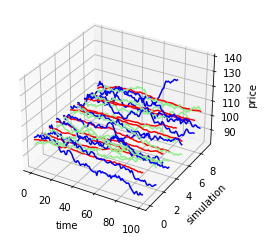

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for mm in range(10):
    xt = []
    yt = []
    zt = []
    for nn in range(len(res[mm])):
        xt.append(res[mm][nn][0])
        yt.append(res[mm][nn][1])
        zt.append(res[mm][nn][2])
    ax.plot(range(100),np.asarray([mm]*100),xt,color = "red")
    ax.plot(range(100),np.asarray([mm]*100),yt,color = "blue")
    ax.plot(range(100),np.asarray([mm]*100),zt,color = "lightgreen")
ax.set_xlabel('time')
ax.set_ylabel('simulation')
ax.set_zlabel('price')

## (c) Basket options simulation

In [74]:
def gbm_basket(S0,K,r,T,mu,sig,a,optype,A,N,M):
    
    dt= T/N
    
    L= cholesky(A)
    
    disc= np.exp(-r*T)
    
    sum_C= 0
    
    for i in range(M):
        
        S1=S0[0]
        S2=S0[1]
        S3=S0[2]
        
        
        
        for j in range(N):
            
            row_z= np.random.normal(0,1,3)
            
            z= np.dot(L,row_z)
            
            S1= S1+ mu[0]*S1*dt+ sig[0]*S1*z[0]*np.sqrt(dt)
            
            S2= S2+ mu[1]*S2*dt+ sig[1]*S2*z[1]*np.sqrt(dt)
            
            S3= S3+ mu[2]*S3*dt+ sig[2]*S3*z[2]*np.sqrt(dt)
            
        
        Ut= a[0]*S1+ a[1]*S2+ a[2]*S3
        
        
        if optype== "c":
            
            C= disc*max(Ut-K,0)
            
        elif optype== "p":
            
            C= disc*max(-Ut+K,0)
        
        sum_C+= C
        
    
    value= sum_C/M
    
    return value
        
    

In [75]:
S0=[100,101,98]
sig=[0.05,0.2,0.15]
mu=[0.03,0.06,0.02]
a=[1/3,1/3,1/3]
A= np.matrix([[1,0.5,0.2],
                [0.5,1,-0.4],
                [0.2,-0.4,1]])

In [76]:
gbm_basket(S0=S0,K=100,r=0.06,T=1,mu=mu,sig=sig,a=a,optype="c",A=A,N=100,M=100)




4.259055339249731

In [77]:
gbm_basket(S0=S0,K=100,r=0.06,T=1,mu=mu,sig=sig,a=a,optype="p",A=A,N=100,M=100)

1.5867162526345826

## (d) Exotic basket option

### (i)

In [78]:
def exgbm_basket1(S0,K,r,T,mu,sig,a,optype,B,A,N,M):
    
    
    dt=T/N
    
    L=cholesky(A)
    
    disc= np.exp(-r*T)
    
    sum_C=0
    
    #nudt= (r+0.5*sig**2)*dt
    #sigsdt= sig*np.sqrt(dt)
    
    for i in range(M):
        
        
        S1= S0[0]
        
        S2= S0[1]
        
        S3= S0[2]
        
        indic=0
        
        for j in range(N):
            
            
            #nudt= (r-div- 0.5*sig**2)*dt
            #sigsdt= sig*np.sqrt(dt)
            
            
            row_z=np.random.normal(0,1,3)
            
            z= np.dot(L,row_z)
            
            S1= S1*np.exp( (mu[0]+0.5*sig[0]**2)*dt+ sig[0]*np.sqrt(dt)*z[0])
            
            S2= S2*np.exp( (mu[1]+0.5*sig[1]**2)*dt+ sig[1]*np.sqrt(dt)*z[1])
            
            S3=S3*np.exp( (mu[2]+0.5*sig[2]**2)*dt+ sig[2]*np.sqrt(dt)*z[2])
            
            
            
            if S2> B:
                
                indic=1
            else:
                
                indic= indic
                
        
        Ut= a[0]*S1+ a[1]*S2+ a[2]*S3
        
        if indic==1:
            
            payoff= disc*max(S2-K,0)
            
            
        else:
            
            payoff= disc*max(Ut-K,0)
            
            
        sum_C+= payoff
        
        
    
    value= sum_C/M
    
    return value
            
            
            
            
       

In [79]:
S0=[100,101,98]
sig=[0.05,0.2,0.15]
mu=[0.03,0.06,0.02]
a=[1/3,1/3,1/3]
A= np.matrix([[1,0.5,0.2],
                [0.5,1,-0.4],
                [0.2,-0.4,1]])

In [80]:
exgbm_basket1(S0=S0,K=100,r=0.06,T=1,mu=mu,sig=sig,a=a,optype="c",B=104,A=A,N=100,M=100)

16.47735805824951

- using different technique

In [81]:
def exgbm_basket1(S0,K,r,T,mu,sig,a,optype,B,A,N,M):
    
    
    dt=T/N
    
    L=cholesky(A)
    
    disc= np.exp(-r*T)
    
    sum_C=0
    
    #nudt= (r+0.5*sig**2)*dt
    #sigsdt= sig*np.sqrt(dt)
    
    for i in range(M):
        
        
        S1= S0[0]
        
        S2= S0[1]
        
        S3= S0[2]
        
        indic=0
        
        for j in range(N):
            
            
            #nudt= (r-div- 0.5*sig**2)*dt
            #sigsdt= sig*np.sqrt(dt)
            
            
            row_z=np.random.normal(0,1,3)
            
            z= np.dot(L,row_z)
            
            S1= S1+ mu[0]*S1*dt+ sig[0]*S1*z[0]*np.sqrt(dt)
            
            S2= S2+ mu[1]*S2*dt+ sig[1]*S2*z[1]*np.sqrt(dt)
            
            S3= S3+ mu[2]*S3*dt+ sig[2]*S3*z[2]*np.sqrt(dt)
            
            
            
            if S2> B:
                
                indic=1
            else:
                
                indic= indic
                
        
        Ut= a[0]*S1+ a[1]*S2+ a[2]*S3
        
        if indic==1:
            
            payoff= disc*max(S2-K,0)
            
            
        else:
            
            payoff= disc*max(Ut-K,0)
            
            
        sum_C+= payoff
        
        
    
    value= sum_C/M
    
    return value
            
            
            
            
       

In [82]:
exgbm_basket1(S0=S0,K=100,r=0.06,T=1,mu=mu,sig=sig,a=a,optype="c",B=104,A=A,N=100,M=100)

13.534326385243855

### (ii)

In [84]:
def exgbm_basket1(S0,K,r,T,mu,sig,a,optype,B,A,N,M):
    
    
    dt=T/N
    
    L=cholesky(A)
    
    disc= np.exp(-r*T)
    
    sum_C=0
    
    #nudt= (r+0.5*sig**2)*dt
    #sigsdt= sig*np.sqrt(dt)
    
    for i in range(M):
        
        
        S1= S0[0]
        
        S2= S0[1]
        
        S3= S0[2]
        
        indic=0
        
        max2=S2
        max3=S3
        
        for j in range(N):
            
            
            #nudt= (r-div- 0.5*sig**2)*dt
            #sigsdt= sig*np.sqrt(dt)
            
            

            
            row_z=np.random.normal(0,1,3)
            
            z= np.dot(L,row_z)
            
            S1= S1*np.exp( (mu[0]+0.5*sig[0]**2)*dt+ sig[0]*np.sqrt(dt)*z[0])
            
            S2= S2*np.exp( (mu[1]+0.5*sig[1]**2)*dt+ sig[1]*np.sqrt(dt)*z[1])
            
            S3=S3*np.exp( (mu[2]+0.5*sig[2]**2)*dt+ sig[2]*np.sqrt(dt)*z[2])
            
            
            if S2>max2:
                
                max2=S2
            else:
                
                max2=max2
                
                
            if S3>max3:
                
                max3=S3
                
            else:
                
                max3=max3
            
            
            
            
            
            
        if max2> max3:
                
            indic=1
        else:
                
            indic=0
                
        
        
        
        Ut= a[0]*S1+ a[1]*S2+ a[2]*S3
        
        
        if indic==1:
            
            
            payoff= disc*max(S2**2-K,0)
        
        elif indic==0 :
            
            
            payoff= disc*max(Ut-K,0)
        
            
        sum_C+= payoff
        
        
    
    value= sum_C/M
    
    return value
            
            
            
            
       

In [85]:
exgbm_basket1(S0=S0,K=100,r=0.06,T=1,mu=mu,sig=sig,a=a,optype="c",B=104,A=A,N=100,M=100)

9131.30610829641

### (iii) & (iv)

In [86]:
def exgbm_basket2(S0,K,r,T,mu,sig,a,optype,B,A,N,M):
    
    
    dt=T/N
    
    L=cholesky(A)
    
    disc= np.exp(-r*T)
    
    sum_C=0
    
    #nudt= (r+0.5*sig**2)*dt
    #sigsdt= sig*np.sqrt(dt)
    
    for i in range(M):
        
        
        S1= S0[0]
        
        S2= S0[1]
        
        S3= S0[2]
        
        indic=0
    
        sumS2=0
        sumS3=0
    
        
        for j in range(N):
            
            
            #nudt= (r-div- 0.5*sig**2)*dt
            #sigsdt= sig*np.sqrt(dt)
            
            

            
            row_z=np.random.normal(0,1,3)
            
            z= np.dot(L,row_z)
            
            S1= S1*np.exp( (mu[0]+0.5*sig[0]**2)*dt+ sig[0]*np.sqrt(dt)*z[0])
            
            S2= S2*np.exp( (mu[1]+0.5*sig[1]**2)*dt+ sig[1]*np.sqrt(dt)*z[1])
            
            S3=S3*np.exp( (mu[2]+0.5*sig[2]**2)*dt+ sig[2]*np.sqrt(dt)*z[2])
            
            
            
            sumS2+=S2
            
            sumS3+=S3
            
            
            
        A2= sumS2/N
        
        A3= sumS3/N
        
        if A2>A3:
            
            indic=1
            
        else:
            
            indic=0
            
        
        
        
        Ut= a[0]*S1+ a[1]*S2+ a[2]*S3
        
        
        if indic==1:
            
            
            payoff= disc*max(A2-K,0)
        
        elif indic==0 :
            
            
            payoff= disc*max(Ut-K,0)
        
            
        sum_C+= payoff
        
        
    
    value= sum_C/M
    
    return value
            
            
            
            
       

In [87]:
exgbm_basket2(S0=S0,K=100,r=0.06,T=1,mu=mu,sig=sig,a=a,optype="c",B=104,A=A,N=100,M=100)

8.7660945324578

#  Problem 4 

## (a)

In [88]:

def Monte_Carlo8(n_,m_,T,S0,V0,k,theta,sig,rho,r,K,f1,f2,f3):
    start = time.time()
    dt = T/n_
    dis = np.exp(-r*T)
    sum_C = 0
    sum_C2 = 0
    for i in range(int(m_)):
        lnSt = np.log(S0)
        Vtt = V0
        Vt = V0
        for j in range(int(n_)):
            z1 = np.random.randn()
            z2 = np.random.randn()
            w1 = z1
            w2 = rho*z1+np.sqrt(1-rho**2)*z2
            Vtt = f1(Vtt)-k*dt*(f2(Vtt)-theta)+sig*f3(Vtt)**0.5*w1*np.sqrt(dt)
            lnSt += (r-0.5*Vt)*dt+np.sqrt(Vt)*w2*np.sqrt(dt)
            Vt = f3(Vtt)
        St = np.exp(lnSt)
        C = dis*max(St-K,0)
        sum_C += C
        sum_C2+= C**2
    mean_C = sum_C/m_
    bias = abs(6.8061-mean_C)
    se = np.sqrt((sum_C2-m_*mean_C**2)/(m_-1)/m_)
    end = time.time()
    return mean_C, bias, se, (end-start)

def fa(x):
    return max(x,0)
def fb(x):
    return abs(x)
def fc(x):
    return x

In [89]:

Monte_Carlo8(n_=1000,m_=100,T=1,S0=100,V0=0.010201,
             k=6.21,theta=0.019,sig=0.61,rho=-0.7,r=0.0319,
             K=100,f1=fa,f2=fa,f3=fa)

(6.1044497330434115,
 0.7016502669565883,
 0.7587362593289545,
 0.8396680355072021)

In [90]:
Monte_Carlo8(n_=100,m_=500,T=1,S0=100,V0=0.010201,
             k=6.21,theta=0.019,sig=0.61,rho=-0.7,r=0.0319,
             K=100,f1=fb,f2=fb,f3=fb)


(7.3252737683098825,
 0.5191737683098827,
 0.3551039754424081,
 0.3923211097717285)

In [91]:

Monte_Carlo8(n_=100,m_=500,T=1,S0=100,V0=0.010201,
             k=6.21,theta=0.019,sig=0.61,rho=-0.7,r=0.0319,
             K=100,f1=fc,f2=fc,f3=fb)


(7.02392340535475,
 0.21782340535474987,
 0.35291666508380937,
 0.3840038776397705)

In [92]:
Monte_Carlo8(n_=1000,m_=100,T=1,S0=100,V0=0.010201,
             k=6.21,theta=0.019,sig=0.61,rho=-0.7,r=0.0319,
             K=100,f1=fc,f2=fc,f3=fa)

(7.035748224270574, 0.22964822427057374, 0.8174595162274783, 0.784987211227417)

In [93]:

Monte_Carlo8(n_=1000,m_=100,T=1,S0=100,V0=0.010201,
             k=6.21,theta=0.019,sig=0.61,rho=-0.7,r=0.0319,
             K=100,f1=fc,f2=fa,f3=fa)


(7.269970379439593, 0.4638703794395935, 0.7677858645423148, 0.8132710456848145)

## (b)

In [94]:

def simpson_int(func,a,b,tol):
    n=10000
    delta = (b-a)/n
    x = np.linspace(a,b,n+1)
    f_x = np.asarray([func(i) for i in x])
    res0 = 0
    res1 = delta/3*(f_x[0]+f_x[-1]+4*f_x[1:-1][::2].sum()+2*f_x[1:-1][1::2].sum())
    while abs(res1-res0)>tol:
        n= n + 10000
        x = np.linspace(a,b,n+1)
        f_x = np.asarray([func(i) for i in x])
        delta = (b-a)/n
        res0 = res1
        res1 = delta/3*(f_x[0]+f_x[-1]+4*f_x[1:-1][::2].sum()+2*f_x[1:-1][1::2].sum())
    return res1

In [95]:
simpson_int(func=(lambda x: x**2),a=0,b=100,tol=0.00001)

333333.3333333334

In [96]:

import scipy.integrate as integrate
def C_integral(tau,S0,V0,k,theta,sig,rho,r,K):
    u1 = 0.5
    u2 = -0.5
    a = k*theta
    b1 = k-rho*sig
    b2 = k
    
    def f1(u):
        com = np.complex(b1,-rho*sig*u)
        d1 = np.sqrt((-com)**2-sig**2*(np.complex(0,2*u1*u)-u**2))
        g1 = (com+d1)/(com-d1)
        C1 = np.complex(0,r*u*tau)+a/sig**2*((com+d1)*tau-2*np.log((1-g1*np.exp(d1*tau))/(1-g1)))
        D1 = (com+d1)/sig**2*((1-np.exp(d1*tau))/(1-g1*np.exp(d1*tau)))
        phi1 = np.exp(C1+D1*V0+np.complex(0,u*np.log(S0)))
        res = ((np.exp(np.complex(0,-np.log(K)*u))*phi1)/(np.complex(0,u))).real
        return res
    def f2(u):
        com = np.complex(b2,-rho*sig*u)
        d2 = np.sqrt((-com)**2-sig**2*(np.complex(0,2*u2*u)-u**2))
        g2 = (com+d2)/(com-d2)
        C2 = np.complex(0,r*u*tau)+a/sig**2*((com+d2)*tau-2*np.log((1-g2*np.exp(d2*tau))/(1-g2)))
        D2 = (com+d2)/sig**2*((1-np.exp(d2*tau))/(1-g2*np.exp(d2*tau)))
        phi2 = np.exp(C2+D2*V0+np.complex(0,u*np.log(S0)))
        res = ((np.exp(np.complex(0,-np.log(K)*u))*phi2)/(np.complex(0,u))).real
        return res
    P1 = 0.5+integrate.quad(f1,0.0001,1500)[0]/np.pi
    P2 = 0.5+integrate.quad(f2,0.0001,1500)[0]/np.pi
    result = S0*P1-K*np.exp(-r*tau)*P2
    return result


In [97]:

C_integral(tau=1,S0=100,V0=0.010201,
             k=6.21,theta=0.019,sig=0.61,rho=-0.7,r=0.0319,
             K=100)

8.472087268998855

- Comparing to values in a and b, the results are similar with given paramaters:
tau=1
S0=100
V0=0.010201
k=6.21
theta=0.019
sig=0.61
rho=-0.7
r=0.0319
K=100
